<a href="https://colab.research.google.com/github/juliusmarkwei/Telecom-Churn/blob/main/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries and Seeting up Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

## Importing Data

In [3]:
path = '/content/drive/MyDrive/Datasets/Telecom Churn.csv'
telecom_data = pd.read_csv(path, sep=',')

In [4]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
telecom_data.shape

(3333, 20)

In [7]:
telecom_data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

We can see there are no null values present in any of the variabels

In [9]:
telecom_data.duplicated().any() # there are no duplicated records

False

## Descriptive Statistics

In [10]:
telecom_data.describe(exclude=[object]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7
Total eve calls,3333.0,NaN,NaN,NaN,100.114311,19.922625,0.0,87.0,100.0,114.0,170.0
Total eve charge,3333.0,NaN,NaN,NaN,17.08354,4.310668,0.0,14.16,17.12,20.0,30.91
Total night minutes,3333.0,NaN,NaN,NaN,200.872037,50.573847,23.2,167.0,201.2,235.3,395.0


In [11]:
telecom_data.describe(exclude=[int, float])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


For the frequecy of the variable 'Churn', I can say the dataset is imbalance since out of 3,333 customers, 2850 of them were classified as not Churn. Also, 'Area Code' must be an object since all existing area codes in the world are just a group of numeric characters identifying a particular network in a country

## Data Analysis

>>**Hypothesis**


    1. I beleive that customers with higher international calls and minuites are more likely to not have left the company. ✅
    2. Also, customers who usually contacts the Customer service providers expected to have have left the company since I assume
       they wouldn't be happy with the comapany's services most at times. ✅
    3. Customers who made more day callss than night calls are more likely to stay with the company and also made less calls to the
       Customer service providers. I assume they are business men/women and are more concerned with their daily calls with their clients.
    4. Customers who made more night calls than day and more compalins to the service providers are more linkely to leave the company.
       I assume they look out for the best night call minuites to talk more with their partners or family.
    5. Customers who have been with the company for a longer period of time are less likely to churn.
    6. Customers who have an international plan are more likely to churn.
    7. Customers who use a lot of international minutes are more likely to churn.

### Univariate Analysis

In [12]:
telecom_data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Categorical Anaylysis

In [13]:
# converting Area Code from int to object
telecom_data['Area code'] = telecom_data['Area code'].astype('object')

In [14]:
numeric_variables = telecom_data.select_dtypes(exclude='object').columns
cateorical_variables = telecom_data.select_dtypes(exclude=['int', 'float']).columns

len(numeric_variables), len(cateorical_variables)

(16, 5)

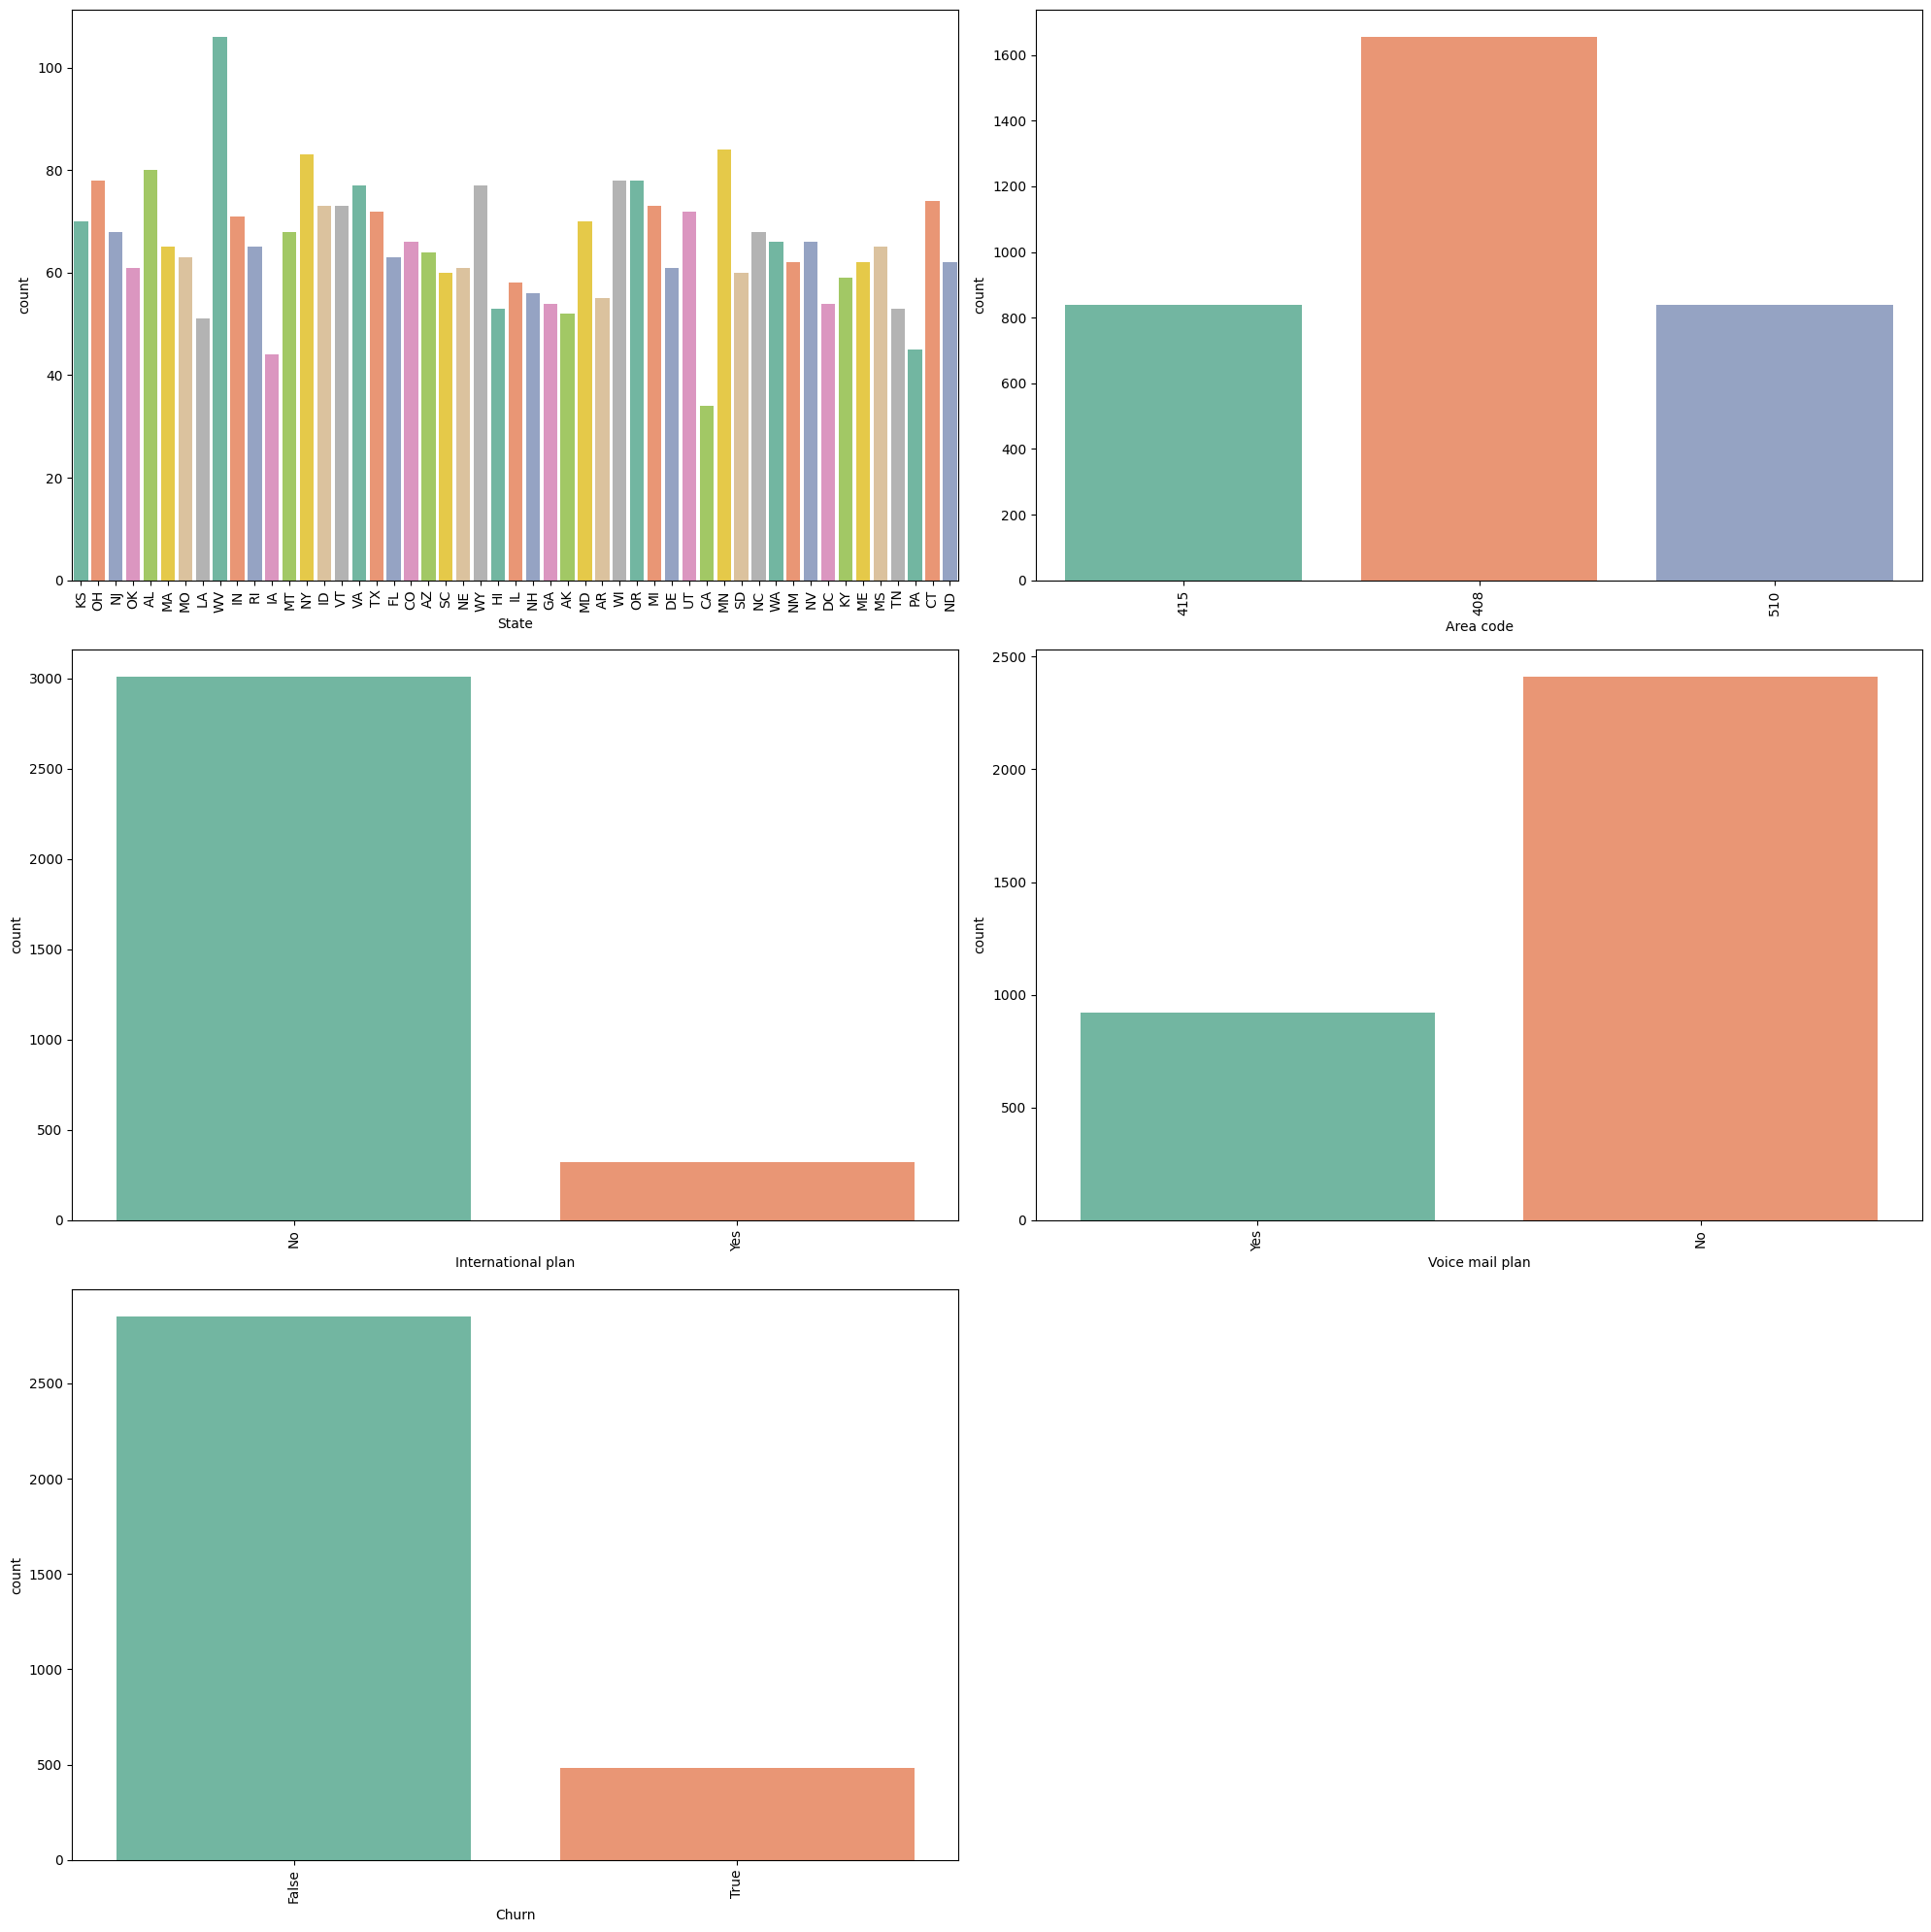

In [15]:
fig = plt.figure(figsize=(20, 20))
for i, var in enumerate(telecom_data[cateorical_variables]):
  ax = fig.add_subplot(3, 2, i + 1)
  sns.countplot(data=telecom_data, x=var, ax=ax, palette='Set2')
  ticks = np.arange(len(telecom_data[var].unique()))
  labels = telecom_data[var].unique()
  ax.set_xticks(ticks, rotation=90, labels=labels)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Numerical Analysis

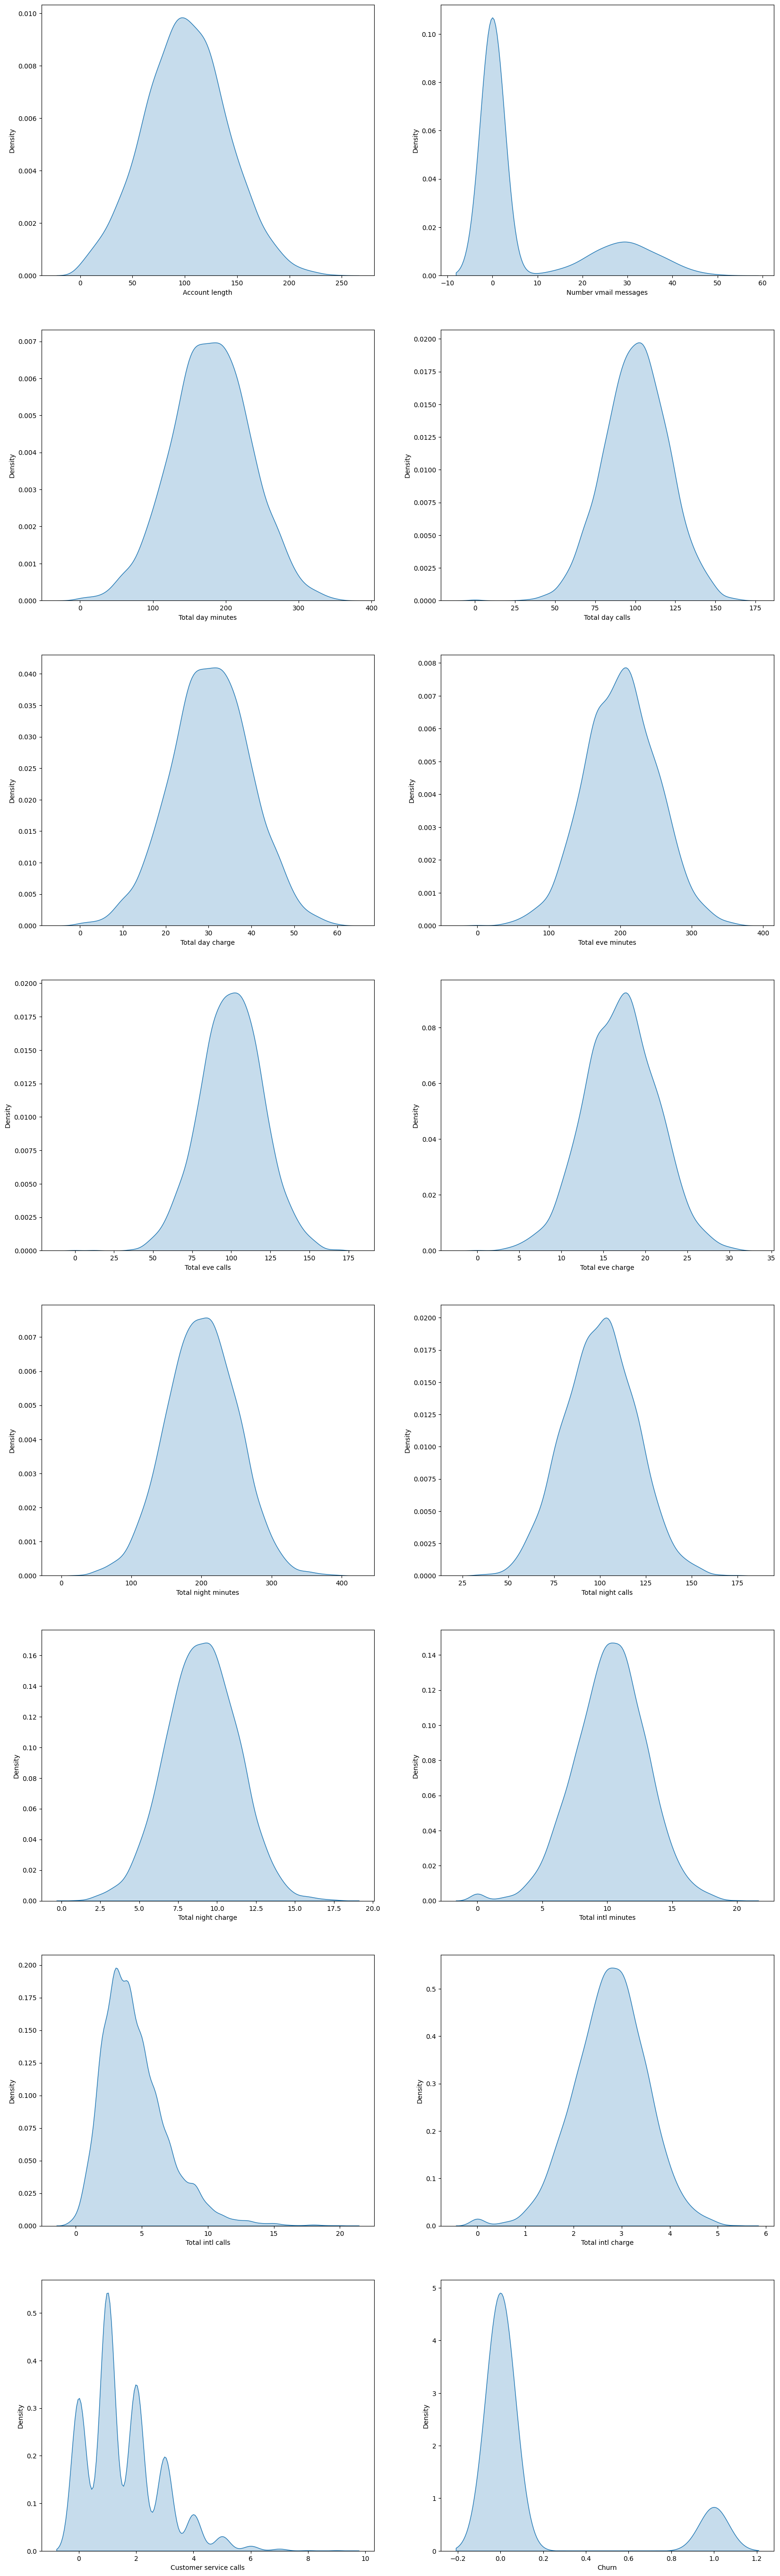

In [16]:
fig, axes = plt.subplots(8, 2, figsize=(20, 70))

# Iterate over the numeric variables
for i, var in enumerate(numeric_variables):
  ax = axes[i // 2, i % 2]
  sns.kdeplot(data=telecom_data, x=var, ax=ax, shade=True)

  # If the subplot is the last one, add a title to the figure
  if i == len(telecom_data.select_dtypes(include='number')) - 1:
    plt.title('Distribution of Numeric Variables')

for ax in axes.flat:
  ax.set_xlabel(ax.get_xlabel())

plt.show()

From the graph, I can tell that the variables **Account length, Total day Minutes, Total  day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total international minutes, and Total international charge** are all ***uniformly distributed***.

Also, we can see the **skewness** in the variable **Customer service calls**, with a little in that of the **Total internationa calls**.

The variable Number of voicemail messages indicate a bimodal type of ditribution with one bump being higher than the other signifying an imbalance of the distibution in that variable.

Clearly, the dependent variable **"Churn"** is imbalance signifying that a lot of cutomers didn't leave the company whereas about one 5th of them left the company.

About the skewed variable, lef use a boxplot to highlight any outlier that may be present in Customer service calls variable.

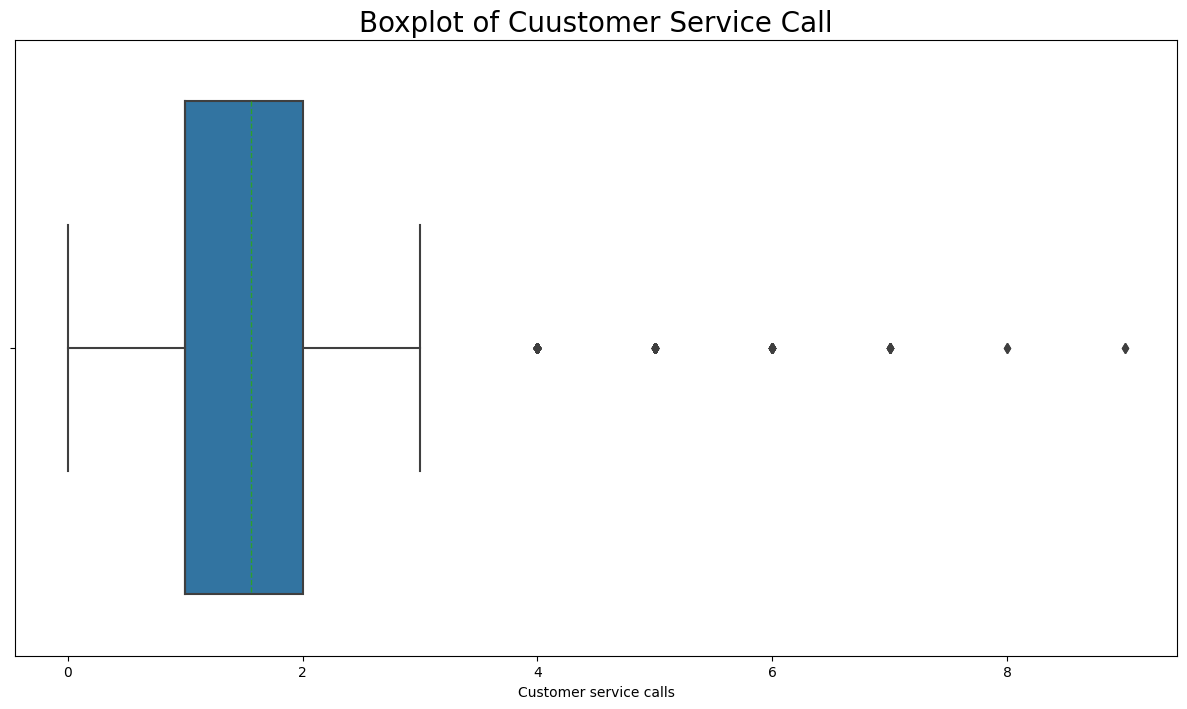

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=telecom_data, x='Customer service calls', showmeans = True, meanline = True)
plt.title('Boxplot of Cuustomer Service Call', fontdict={'fontsize': 20})
plt.show()

We can clearly see the cause of the bumps as a result of the multiple outliers in the variables. This shows that a few of the customer made freuesnt calls to the cusotmer service providers.

### Bivariate & Multivariate Analysis

Cutomer Service Calls vs Churns

In [18]:
set(telecom_data['Voice mail plan'])

{'No', 'Yes'}

In [19]:
# changing the dtype of Voice mail plan from yes/no to their corresponf=ding numeric values

def yes_no_to_1_0(value: str) -> int:
  if value == 'Yes':
    return 1
  elif value == 'No':
    return 0

telecom_data['Voice mail plan'] = telecom_data['Voice mail plan'].apply(yes_no_to_1_0)
set(telecom_data['Voice mail plan'])

{0, 1}

In [20]:
telecom_data['Churn'] = telecom_data['Churn'].astype(int) # converting churn values from boolean to their correspnding integer values

In [21]:
np.unique(telecom_data['Churn'])

array([0, 1])

In [22]:
telecom_data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [23]:
telecom_data['International plan'] = telecom_data['International plan'].apply(yes_no_to_1_0)

In [24]:
np.unique(telecom_data['Area code']) # unique Area Codes of the whole population of the dataset

array([408, 415, 510], dtype=object)

In [25]:
def convert_area_code_to_int(area_code: str) -> int:
    # Check if area_code is an integer and convert it to a string
    if isinstance(area_code, int):
        area_code = str(area_code)

    code = area_code.strip()
    return 1 if code == "408" else (2 if code == "415" else 3)


telecom_data['Area code'] = telecom_data['Area code'].apply(convert_area_code_to_int)
set(telecom_data['Area code'])

{1, 2, 3}

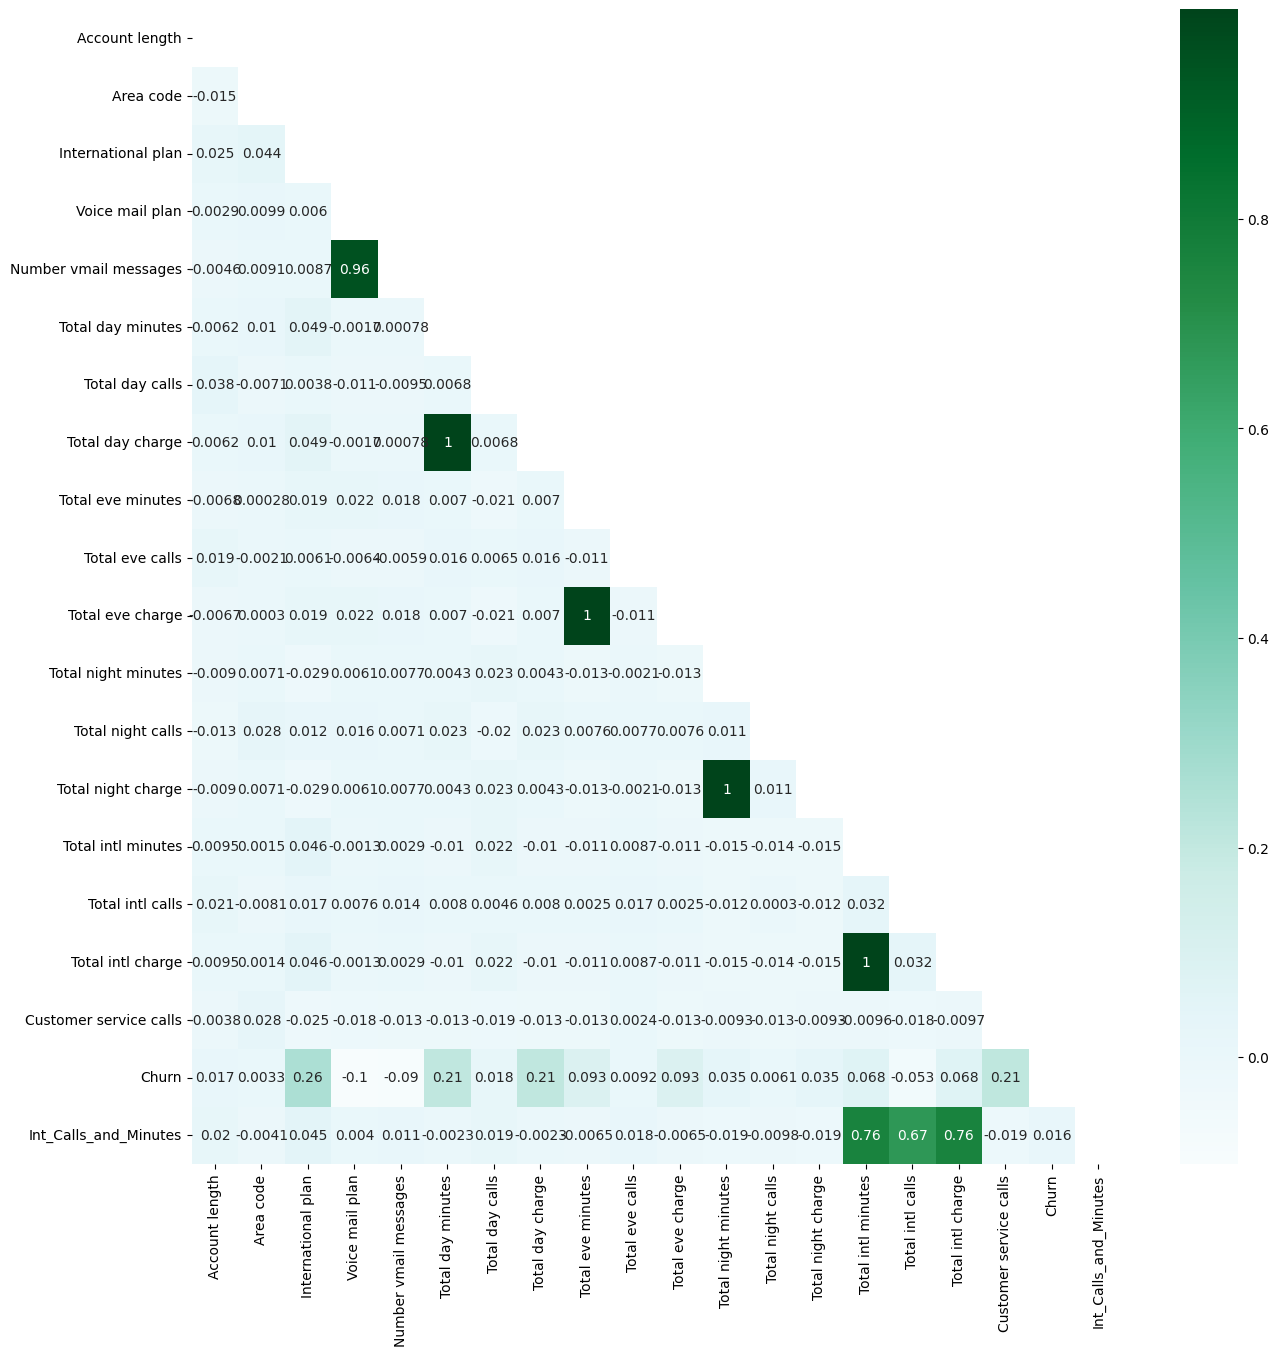

In [34]:
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(telecom_data.corr()))
sns.heatmap(telecom_data.corr(), annot=True, mask=mask, cmap='BuGn')
plt.show()

**Insights from the heatmap above**

    a. It makes sence that the higher charges on the call made during the Day, Evening, Night, and Interntionally are strongly correlate
    with the number of minutes spent by customers on the phone.
    b. Also there is  weak positive correlation between the International Plan,Total day minutes, Total day charge and Customer service
    alls, indicating their high contribution towards a cutomers leaving the telecom company.

### **Hypothesis testing**

#### Lets now test the hypothesis we stated earlier 💹

    1. I beleive that customers with higher international calls and minuites are more likely to not have left the company.

In [27]:
telecom_data['Int_Calls_and_Minutes'] = telecom_data['Total intl calls'] + telecom_data['Total intl minutes']
pd.pivot_table(data=telecom_data, index='Churn', values='Int_Calls_and_Minutes', aggfunc=[np.sum, np.mean, 'count'])

,sum,mean,count
,Int_Calls_and_Minutes,Int_Calls_and_Minutes,Int_Calls_and_Minutes
Churn,,,
0,41871.8,14.691860,2850
1,7179.1,14.863561,483


We can simply tell from the table above that customers with high international call and minutes less likely leave the company.

    2. Also, customers who usually contacts the Customer service providers expected to have have left the company since I assume they
    wouldn't be happy with the comapany's services most at times.

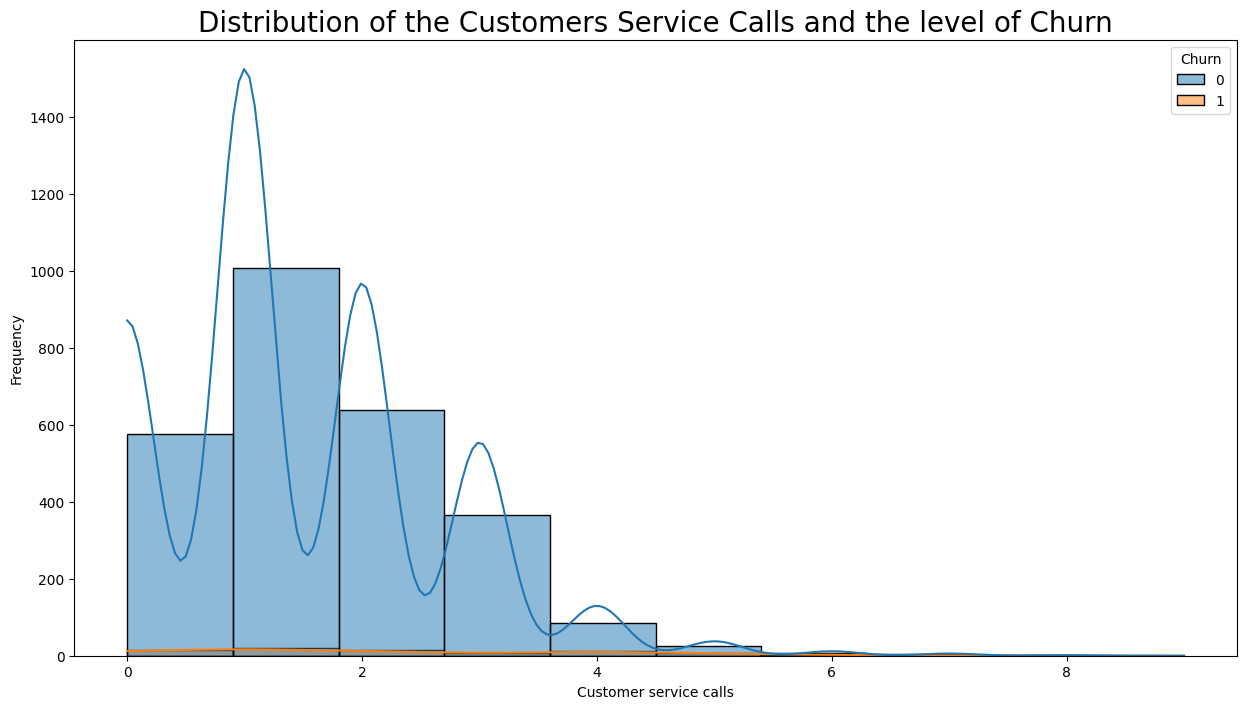

In [28]:
plt.figure(figsize=(15, 8))
sns.histplot(data=telecom_data, x='Customer service calls', hue='Churn', stat='frequency', kde=True,\
             bins=len(set(telecom_data['Customer service calls'])))
plt.title('Distribution of the Customers Service Calls and the level of Churn', fontdict={'fontsize': 20})
plt.show()

In [29]:
pd.pivot_table(data=telecom_data, index='Churn', values='Customer service calls', aggfunc=[np.sum, np.mean, 'count'])

,sum,mean,count
,Customer service calls,Customer service calls,Customer service calls
Churn,,,
0,4132,1.449825,2850
1,1077,2.229814,483


In [30]:
pd.pivot_table(data=telecom_data, index='Customer service calls', values='Churn', aggfunc=[np.sum, np.mean, 'count']).T

,Customer service calls,0,1,2,3,4,5,6,7,8,9
sum,Churn,92.000000,122.000000,87.000000,44.000000,76.000000,40.000000,14.000000,5.000000,1.0,2.0
mean,Churn,0.131994,0.103302,0.114625,0.102564,0.457831,0.606061,0.636364,0.555556,0.5,1.0
count,Churn,697.000000,1181.000000,759.000000,429.000000,166.000000,66.000000,22.000000,9.000000,2.0,2.0


Though most customer made less calls to the customer service providers, only 2 customer made the most calls and they all left the company. Most people made 1 or 2 calls to the customer service and about very few of them left the company with the majority staying.

    3. Customers who made more day callss than night calls are more likely to stay with the company and also made less calls to the
       Customer service providers. I assume they are business men/women and are more concerned with their daily calls with their
       clients.